In [1]:
import numpy as np
from matplotlib import pyplot as plt
import torch
from networks import fcn

In [2]:
data = np.load(r'E:\Heat_diffusion_laser_metadata\30_Sep_2025_06_30_29_FBH13mm_step_size_sim_step_0_002m_p1.npz', allow_pickle=True)
data = np.array(data['data'], dtype=np.float32)


In [3]:
data.shape

(409, 240, 320)

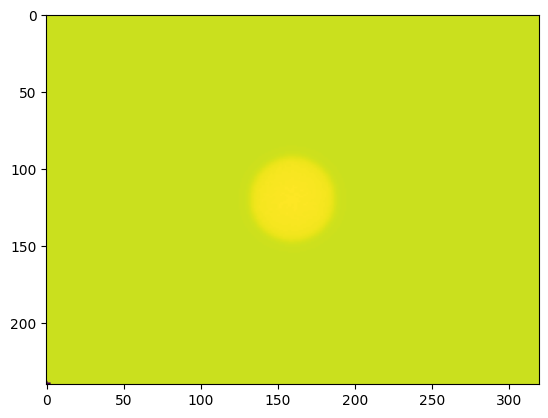

In [4]:
plt.imshow(data[10,:,:])

In [5]:
layers_temp = np.array([3,30,30,30,30,30,30,30,30,1]) #8 hidden layers
layer_lap=np.array([3,20,20,1])

PINN=fcn(layers_temp,layer_lap)

In [6]:
print(PINN)

fcn(
  (activation): Tanh()
  (loss_function): MSELoss()
  (linears_temp): ModuleList(
    (0): Linear(in_features=3, out_features=30, bias=True)
    (1-7): 7 x Linear(in_features=30, out_features=30, bias=True)
    (8): Linear(in_features=30, out_features=1, bias=True)
  )
  (linears_lap): ModuleList(
    (0): Linear(in_features=3, out_features=20, bias=True)
    (1): Linear(in_features=20, out_features=20, bias=True)
    (2): Linear(in_features=20, out_features=1, bias=True)
  )
)


In [7]:
PINN.a_x

Parameter containing:
tensor([1.0000e-06], requires_grad=True)

In [8]:
t,y,x=data.shape
y_center=y//2
x_center=x//2

spread=75

data=data[10:,y_center-spread:y_center+spread,x_center-spread:x_center+spread]

In [9]:
data.shape

(399, 150, 150)

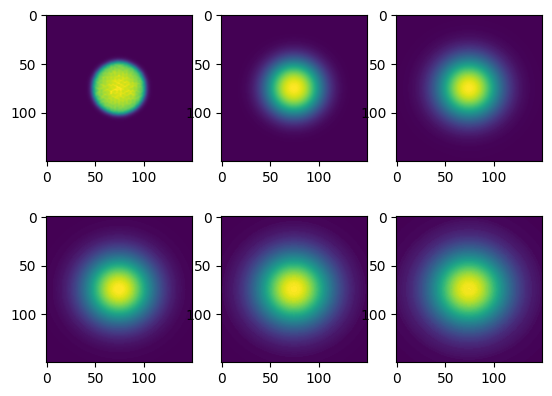

In [10]:
for i in range(6):    
    plt.subplot(2,3,i+1)
    plt.imshow(data[i*70])

In [11]:
Nt,Ny,Nx=data.shape

t = torch.linspace(0, 1, Nt)
x = torch.linspace(0, 1, Nx)
y = torch.linspace(0, 1, Ny)

tt, yy, xx = torch.meshgrid(t, y, x, indexing='ij')

coords = torch.stack([tt, yy,xx], dim=-1)  # shape (399, 100, 100, 3)
coords = coords.reshape(-1, 3)              # shape (399*100*100, 3)

values = data.reshape(-1, 1)                   # shape (399*100*100, 1)
values=torch.from_numpy(values)

In [12]:
idx = torch.randperm(coords.shape[0])[:100000]

In [13]:
idx

tensor([3229813, 4711877, 6319111,  ..., 5000250,  815595, 3860408])

In [14]:
X_train=coords[idx]
y_train=values[idx]

In [15]:
X_train.size()

torch.Size([100000, 3])

In [16]:
y_train[0]

tensor([29304.])

In [17]:
idx_batch=torch.randperm(idx.shape[0])[:5000]

In [18]:
idx_batch

tensor([63525, 61387, 18072,  ..., 83475, 54607, 41000])

In [19]:
100000/5000

20.0

In [20]:
X_train.size()

torch.Size([100000, 3])

In [21]:
y_train.size()

torch.Size([100000, 1])

In [22]:
862823232.000000-859426432.000000

3396800.0

In [23]:
device=torch.device("cuda" if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [24]:
print(torch.__version__)
print(torch.version.cuda)
print(torch.backends.cudnn.version())

2.9.0+cu130
13.0
91200


In [25]:
i=1
for j in range(0, 100000, 5000):
    print(i)
    i=i+1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [26]:
(0.4+0.4+0.4+0.4)/4

0.4

In [27]:
y_train=y_train*1e-2

In [28]:
y_train

tensor([[293.0400],
        [294.4500],
        [293.1400],
        ...,
        [293.0000],
        [293.0400],
        [293.0200]])

In [29]:
100**2

10000

In [30]:
0.4138*100**2/399

10.37092731829574